#### Importing some of the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the CSV file containing Spam-Ham Dataset.

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Removing some of the cells in dataset that are not necessary.

In [3]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

#### Renaming the column headers and adding a column that stores the length of the message.

In [4]:
df.columns = ['category','message']
l = []
for i,c,m in df.itertuples():
    l.append(len(m))
df.insert(2,'length',l)
df.head(5)

,category,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Displaying the number of 'spam' and 'ham' messages.

In [5]:
df['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

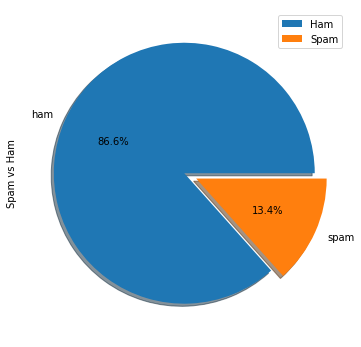

In [6]:
df["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

#### Defining input and output for the model and splitting the 'training' and 'test' set.

In [7]:
X,y = df['message'],df['category']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

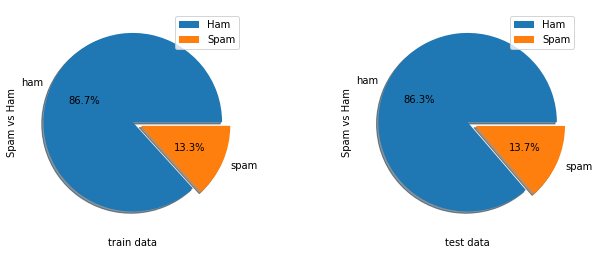

In [12]:
# displaying the splitted training and test sets.
plt.figure(1, figsize = (10, 10))
plt.subplot(121)
y_train.value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.xlabel('train data')
plt.legend(["Ham", "Spam"])
plt.subplot(122)
y_test.value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.xlabel('test data')
plt.legend(["Ham", "Spam"])
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Importing libraries for the model.

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#### Defining and training the model.

In [69]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('svm',LinearSVC())])

In [70]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

#### Obtaining predictions on the test set.

In [71]:
predictions = text_clf.predict(X_test)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

#### Importing libraries and calculating classification_report and accuracy_score.

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [73]:
print(confusion_matrix(y_test, predictions))

[[1581    6]
 [  27  225]]


In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       0.97      0.89      0.93       252

   micro avg       0.98      0.98      0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [75]:
acc = accuracy_score(y_test, predictions)
acc = round((acc*100),2)
print('Accuracy: ',acc,'%')

Accuracy:  98.21 %


#### Testing the model using new data from user.

In [81]:
msg = [input('enter a text: ')]

enter a text:  call me after the meeting.


In [82]:
text_clf.predict(msg)[0]

'ham'

In [83]:
msg = [input('enter a text: ')]

enter a text:  Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP


In [84]:
text_clf.predict(msg)[0]

'spam'